# Project: Colours in Astronomy

# Ex-3 
Blackbody energy distribution curve for a given temperature

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
%matplotlib inline

In [27]:
wavelengths=np.arange(100,30000,100)*u.AA
def rp(T,wv=wavelengths):
    exponential = 1/(np.exp(const.h*const.c/(wv*const.k_B*T))-1)
    prefactor = 2*np.pi*const.h*const.c*const.c/wv**5
    return prefactor*exponential
    #coeff=(2*np.pi*(const.c**2)*const.h)
    #var=(1/wv**5)*(1/((np.exp((const.c*const.h)/(wv*const.k_B*T)))-1))
    #return coeff*var
def rp_norm(T,wv=wavelengths):
    pwr=rp(T)
    max_=np.max(pwr.value)
    return rp(T,wv)/max_,max_
def rp_point_norm(T,wv):
    pwr,peak=rp_norm(T)
    return (((rp((T),wv)).value)/peak)


In [3]:
T1=5000*u.K
radiated_power_5000,peak_wv_5000=rp_norm(T1)
T2=12500*u.K
radiated_power_12500,peak_wv_12500=rp_norm(T2)

In [4]:
#peak wavelengths
peak_B=4400*u.AA
peak_V=5500*u.AA
power=radiated_power_5000.unit
##ax.plot([t,t],[0,np.sin(t)], color ='red',  linewidth=1.5, linestyle="--") ##

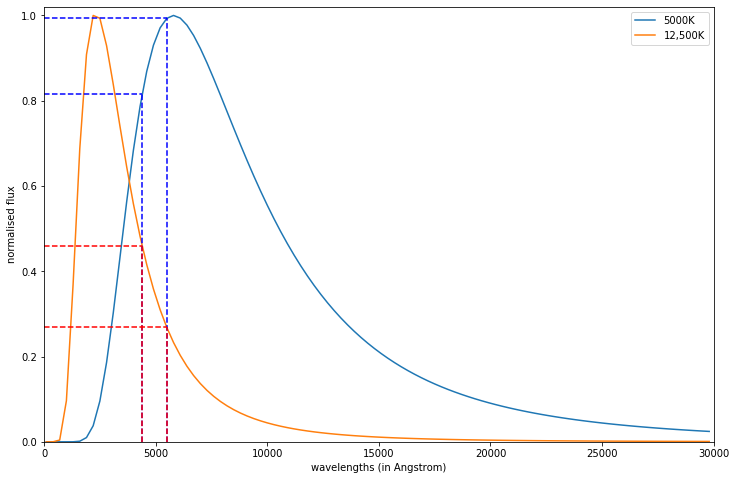

In [5]:
board=plt.figure(figsize=(12,8))
fig=board.add_subplot(1,1,1)
fig.plot(wavelengths,radiated_power_5000,label='5000K')
fig.plot(wavelengths,radiated_power_12500,label='12,500K')
fig.plot([peak_B.value,peak_B.value]*u.AA,[0,(rp_point_norm(T1,peak_B))]*power, color ='blue',  linewidth=1.5, linestyle="--")
fig.plot([0,peak_B.value]*u.AA,[(rp_point_norm(T1,peak_B)),(rp_point_norm(T1,peak_B))]*power, color ='blue',  linewidth=1.5, linestyle="--")
fig.plot([peak_V.value,peak_V.value]*u.AA,[0,(rp_point_norm(T1,peak_V))]*power, color ='blue',  linewidth=1.5, linestyle="--")
fig.plot([0,peak_V.value]*u.AA,[(rp_point_norm(T1,peak_V)),(rp_point_norm(T1,peak_V))]*power, color ='blue',  linewidth=1.5, linestyle="--")

fig.plot([peak_B.value,peak_B.value]*u.AA,[0,(rp_point_norm(T2,peak_B))]*power, color ='red',  linewidth=1.5, linestyle="--")
fig.plot([0,peak_B.value]*u.AA,[(rp_point_norm(T2,peak_B)),(rp_point_norm(T2,peak_B))]*power, color ='red',  linewidth=1.5, linestyle="--")
fig.plot([peak_V.value,peak_V.value]*u.AA,[0,(rp_point_norm(T2,peak_V))]*power, color ='red',  linewidth=1.5, linestyle="--")
fig.plot([0,peak_V.value]*u.AA,[(rp_point_norm(T2,peak_V)),(rp_point_norm(T2,peak_V))]*power, color ='red',  linewidth=1.5, linestyle="--")

fig.set_xlim([0,30000])
fig.set_ylim([0.0,1.02])
fig.set_xlabel('wavelengths (in Angstrom)')
fig.set_ylabel('normalised flux')
fig.legend()

# Ex-4

In [6]:
temparatures=np.arange(2000,21000,2300)*u.K
temparatures[3]+=1100*u.K
temparatures

<Quantity [ 2000.,  4300.,  6600., 10000., 11200., 13500., 15800., 18100.,
           20400.] K>

C:\Users\saris\anaconda3\lib\site-packages\astropy\units\quantity.py:481: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


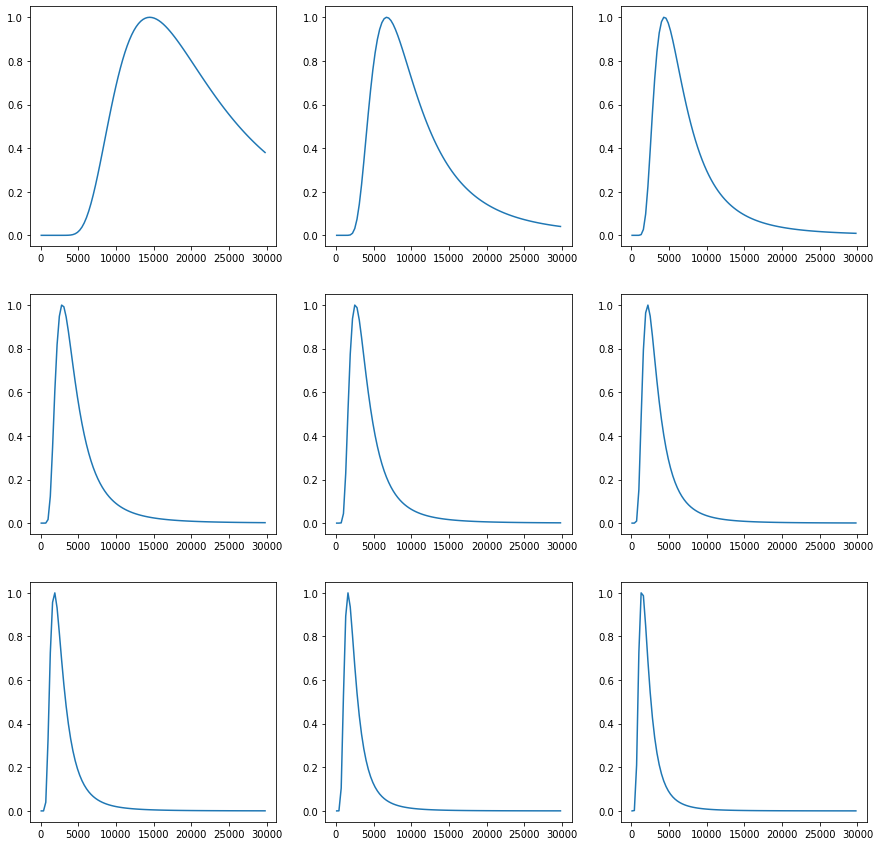

In [7]:
board2=plt.figure(figsize=(15,15))
figures=[1,2,3,4,5,6,7,8,9]
for i in range(9):
    figures[i]=board2.add_subplot(3,3,i+1)
    figures[i].plot(wavelengths,rp_norm(temparatures[i])[0])

In [8]:
T_vega=9790*u.K
FB_vega=rp(T_vega,peak_B)
FV_vega=rp(T_vega,peak_V)
def BV_peaks(t):
    F_B=rp(t,peak_B)
    F_V=rp(t,peak_V)
    B_V=(-2.5)*np.log10((F_B/F_V)*(FV_vega/FB_vega))
    return B_V

In [9]:
F_B_vega=np.mean(rp(T_vega,np.arange(3400,5400,80)*u.AA))
F_V_vega=np.mean(rp(T_vega,np.arange(4500,6400,80)*u.AA))
def BV_range(t):
    F_B=rp(t,np.arange(3400,5400,100)*u.AA)
    F_V=rp(t,np.arange(4500,6400,100)*u.AA)
    B_V=(-2.5)*np.log10((np.mean(F_B)/np.mean(F_V))*(F_V_vega/F_B_vega))
    return B_V

Text(0, 0.5, 'Temparatures (K)')

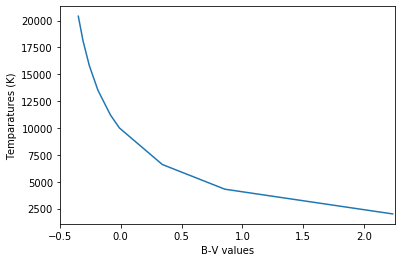

In [10]:
bvs=[]
bvps=[]
for i in temparatures:
    bvs.append(BV_range(i))
    bvps.append(BV_peaks(i))
plt.plot(bvs,temparatures)
plt.xlim([-0.5,2.25])
plt.xlabel('B-V values')
plt.ylabel('Temparatures (K)')
#plt.plot(bvps,temparatures)

In [11]:
BV_spica=-0.13
BV_antares=1.83

In [12]:
temps=np.arange(2000,20000,100)*u.K
BVs_from_temp=[]
for temp in temps:
    BVs_from_temp.append(BV_peaks(temp))
BVs_from_temp=np.array(BVs_from_temp)
def temp_from_BV(BV):
    diff=np.abs(BVs_from_temp-BV)
    index=np.where(diff==np.amin(diff))
    return temps[index]

print("Calculated temparature of Spica using is",temp_from_BV(BV_spica)[0])
print("Calculated temparature of Spica using is",temp_from_BV(BV_antares)[0])

Calculated temparature of Spica using is 12400.0 K
Calculated temparature of Spica using is 2700.0 K


# Ex 5

C:\Users\saris\anaconda3\lib\site-packages\astropy\units\quantity.py:481: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


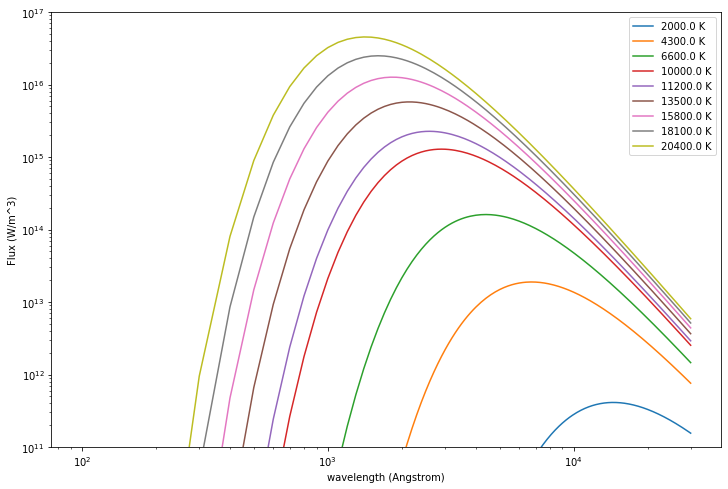

In [33]:
board3=plt.figure(figsize=(12,8))
ax=board3.add_subplot(1,1,1)
for temp in temparatures:
    ax.plot(wavelengths,rp(temp)*(10**50),label=temp)
ax.set_yscale('log')
ax.set_ylabel('Flux (W/m^3)')
ax.set_ylim([10**11,10**17])
ax.set_xscale('log')
ax.set_xlabel('wavelength (Angstrom)')
ax.legend()

C:\Users\saris\anaconda3\lib\site-packages\astropy\units\quantity.py:481: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Text(0, 0.5, 'log(T) (in K)')

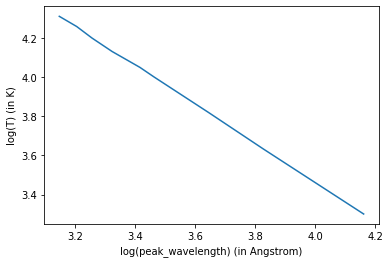

In [35]:
peak_wls=np.zeros(9)*u.AA
for i in range(len(temparatures)):
    values=rp(temparatures[i])
    max_index=np.where(np.amax(values)==values)
    peak_wls[i]=(wavelengths[max_index])
peak_wls=np.array(peak_wls.value)
plt.plot(np.round(np.log10(peak_wls),4),np.round(np.log10(temparatures.value),4))
plt.xlabel('log(peak_wavelength) (in Angstrom)')
plt.ylabel('log(T) (in K)')

In [116]:
from scipy.optimize import curve_fit
def linear(x,m,c):
    return m*x+c
p_opt,p_cof=curve_fit(linear,np.log10(peak_wls),np.log10(temparatures.value))
m=p_opt[0]
c=p_opt[1]
#we know log(T)=m(log(wv))+c
#T=(e^c)*(wv^m)
#m is approximately (-1)
wiens_const_AK=(10**c)*(u.AA*u.K)#in angstrom-K
wiens_const=wiens_const_AK.to(u.m*u.K)

In [125]:
def temp_from_peak_wv(wv):
    wv.to(u.m)
    return wiens_const/wv
peak_wv_sun=5300*u.AA
peak_wv_ps=3500*u.AA
print("Temparature of sun using wien's law is",np.round(temp_from_peak_wv(peak_wv_sun).to(u.K),2))
print("Temparature of pole star using wien's law is",np.round(temp_from_peak_wv(peak_wv_ps).to(u.K),2))

Temparature of sun using wien's law is 4933.65 K
Temparature of pole star using wien's law is 7470.96 K


In [37]:
file=fits.open('M32_V_ExpTime60s_1.fit')
file.info()

Filename: M32_V_ExpTime60s_1.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (2048, 2048)   int16 (rescales to uint16)   


In [34]:
data=file[0].data

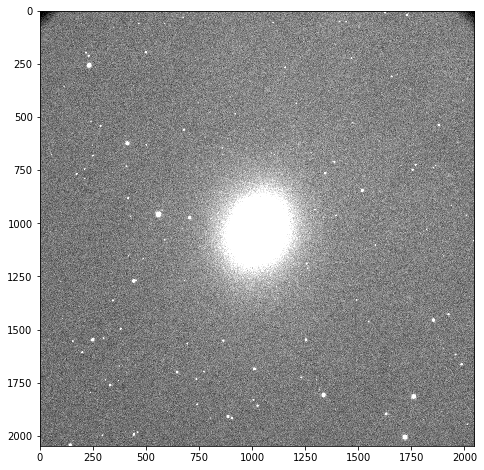

In [35]:
mean,median,std=sigma_clipped_stats(data)
board2=plt.figure(figsize=(8,8))
fig2=board2.add_subplot(1,1,1)
fig2.imshow(data, vmin=median-6*std,vmax=median+6*std,cmap='gray')
fig2.colorbar()